## Simulate wc_lang model with wc_sim

In [1]:
import os
import tempfile
from argparse import Namespace
import matplotlib.pyplot as plt
# allow embedded plots in the notebook
%matplotlib inline

### import simulate and run results

In [2]:
from wc_sim.multialgorithm.__main__ import SimController
from wc_sim.multialgorithm.run_results import RunResults

### Select a tiny model 

In [3]:
steady_rate_model_filename = os.path.join(os.getcwd(), '../../tests/multialgorithm/fixtures',
                                              '2_species_1_reaction.xlsx')
reactant_rate_model_filename = os.path.join(os.getcwd(), '../../tests/multialgorithm/fixtures',
                              '2_species_1_reaction_with_rates_given_by_reactant_population.xlsx')


### Set up the inputs

In [4]:
checkpoints_dir = tempfile.mkdtemp()
args = Namespace(
    model_file=reactant_rate_model_filename,
    end_time=1000,
    checkpoint_period=50,
    checkpoints_dir=checkpoints_dir
)
SimController.process_and_validate_args(args)

### Simulate

In [5]:
num_events, results_dir = SimController.simulate(args)

Simulated 2061 events
Saved checkpoints and run results in '/tmp/tmpapxd5ldg/2018-05-24-18-03-49'


/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:1471 PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->bytes,key->values] [items->None]

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:1471 PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->values] [items->None]



In [6]:
# view results
run_results = RunResults(results_dir)

In [7]:
print(run_results.get('populations'))

        spec_type_0[c]  spec_type_1[c]
0.0             2000.0             0.0
50.0             874.0          1126.0
100.0            367.0          1633.0
150.0            166.0          1834.0
200.0             68.0          1932.0
250.0             35.0          1965.0
300.0             13.0          1987.0
350.0              5.0          1995.0
400.0              2.0          1998.0
450.0              2.0          1998.0
500.0              0.0          2000.0
550.0              0.0          2000.0
600.0              0.0          2000.0
650.0              0.0          2000.0
700.0              0.0          2000.0
750.0              0.0          2000.0
800.0              0.0          2000.0
850.0              0.0          2000.0
900.0              0.0          2000.0
950.0              0.0          2000.0
1000.0             0.0          2000.0


In [8]:
print(RunResults.COMPONENTS)
print(run_results._hdf_file())

{'metadata', 'populations', 'random_states', 'aggregate_states'}
/tmp/tmpapxd5ldg/2018-05-24-18-03-49/run_results.h5


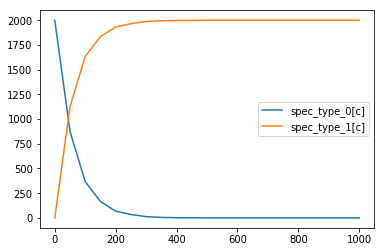

In [9]:
axes = run_results.get('populations').plot()